# **1. Perkenalan Dataset**


Pada bagian ini, saya akan memperkenalkan dataset, asal data : 

- Dataset: **gariskemiskinan.csv**
- Deskripsi: Dataset ini berisi informasi tentang garis kemiskinandiberbagai provinsi di Indonesia yang di kategorikan berdasarkan provinsi, jenis pengeluaran, daerah(kota/desa), tahun, dan periode.  

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [51]:
#Type import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.graph_objects as go
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
import os
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
df = pd.read_csv('gariskemiskinan.csv')
df.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [5]:
df.shape

(5460, 6)

# **4. Exploratory Data Analysis (EDA)**

1. Memahami Struktur Data

In [8]:
# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
             tahun             gk
count  5460.000000    5261.000000
mean   2018.115385  303904.185516
std       2.577159  158176.024903
min    2013.000000   48561.000000
25%    2016.000000  144674.000000
50%    2018.000000  313294.000000
75%    2020.000000  410188.000000
max    2022.000000  872843.000000


Insight: 
- Data tersebar cukup merata dari 2013 hingga 2022.
- Terdapat variasi yang cukup besar pada nilai gk, dengan beberapa nilai ekstrem yang tinggi.
- Nilai median gk (313.294) lebih rendah dari rata-rata (303.904), yang mungkin menunjukkan adanya nilai ekstrem yang mempengaruhi distribusi.

In [7]:
df.dtypes

provinsi     object
jenis        object
daerah       object
tahun         int64
periode      object
gk          float64
dtype: object

Insight:
- Dataset ini berisi kombinasi data kategorikal dan numerik

2. Menangani Data yang Hilang

In [6]:
df.isnull().sum()

provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

insight: 

Untuk mengetahui apakah perlu dilakukan imputasi atau penghapusan data.

3. Analisis Distribusi dan Korelasi

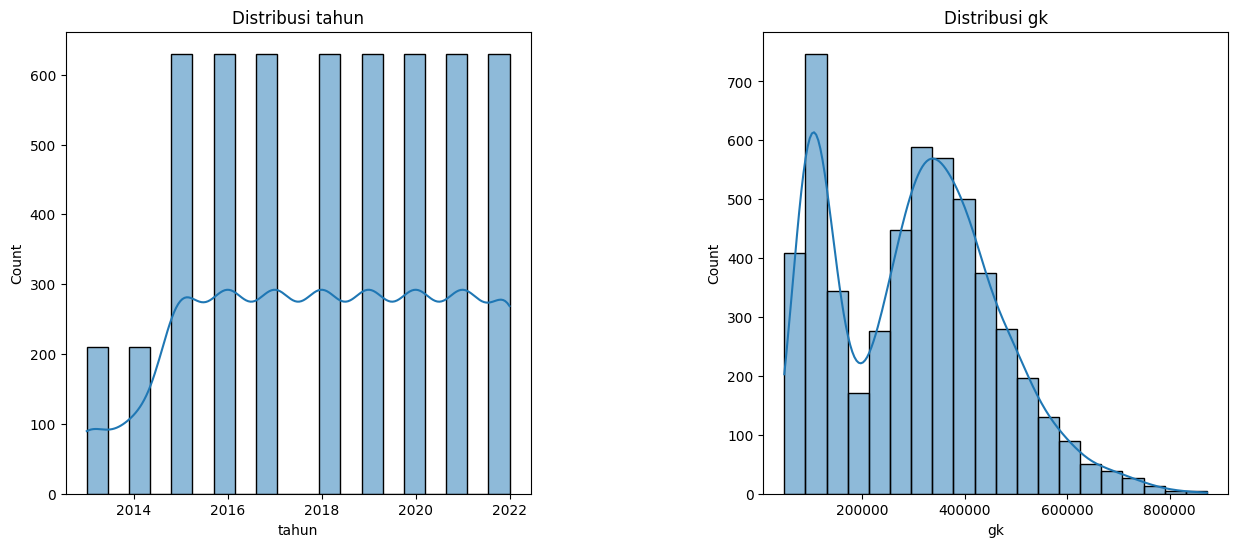

In [18]:
plt.figure(1, figsize=(15, 6))
n = 0


for x in ['tahun', 'gk']:
    n += 1
    plt.subplot(1, 2, n)  
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    
   
    sns.histplot(df[x], bins=20, kde=True)
    plt.title(f'Distribusi {x}')

plt.show()


Insight:
- Data dari tahun 2015 ke atas lebih representatif karena memiliki jumlah observasi yang tinggi dan konsisten.
- Distribusi garis kemiskinan menunjukkan adanya dua kelompok utama, yang bisa jadi mewakili daerah dengan tingkat ekonomi berbeda (misalnya daerah perkotaan vs pedesaan).

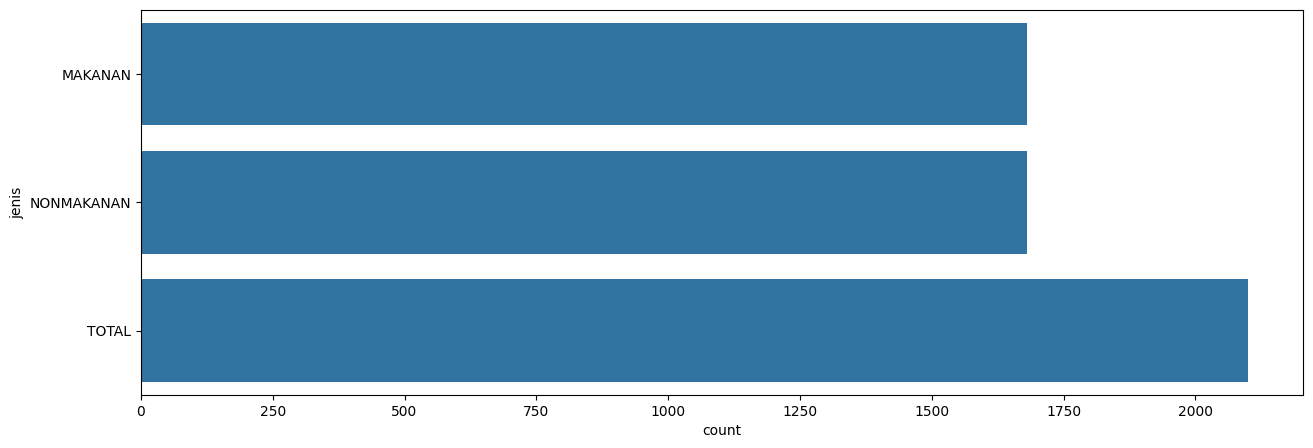

In [14]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'jenis' , data = df)
plt.show()

Insight: 
- Jika tujuan analisis adalah membandingkan jumlah item antara makanan dan non-makanan, maka kategori "TOTAL" sebaiknya dihapus dari visualisasi agar tidak membingungkan.

Menggambarkan Hubungan Antara Tahun dan gk

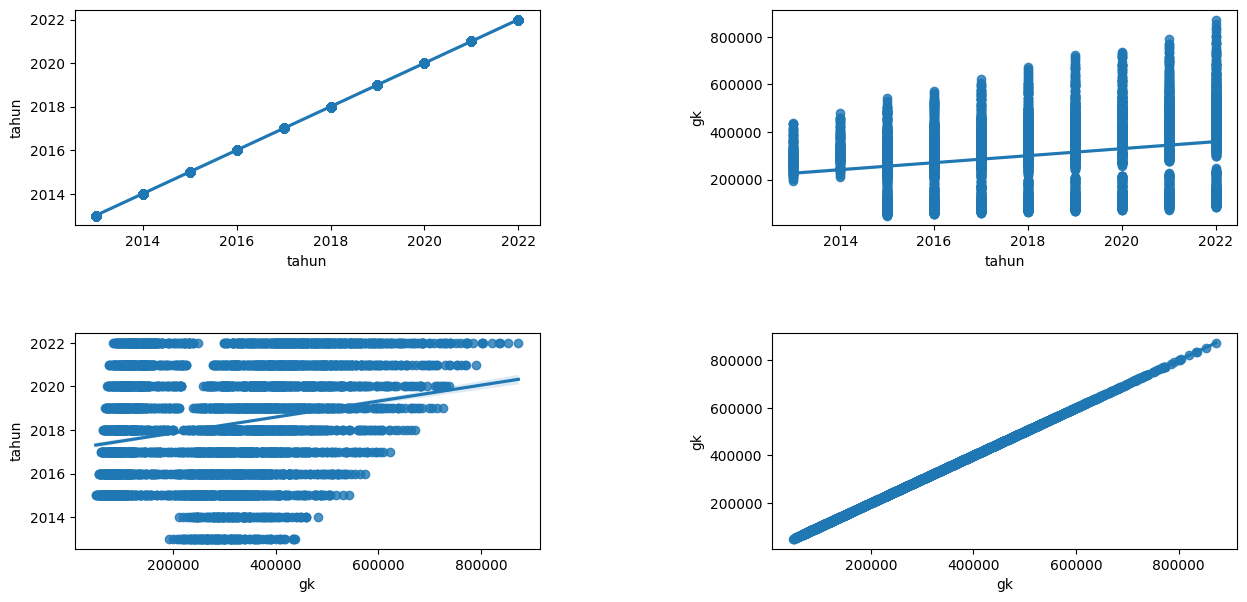

In [ ]:
plt.figure(1, figsize=(15, 7))
n = 0
for x in ['tahun', 'gk']:
    for y in ['tahun', 'gk']:
        n += 1
        plt.subplot(2, 2, n)  
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=df)
        plt.ylabel(y)
        plt.xlabel(x)
plt.show()

Insight:
- Tren Garis Kemiskinan (GK) Meningkat. 
Garis kemiskinan terus mengalami kenaikan dari tahun 2014 hingga 2022, menunjukkan peningkatan batas minimum kebutuhan hidup setiap tahunnya.
- Distribusi GK per Tahun. 
Penyebaran nilai GK per tahun cukup bervariasi, yang bisa disebabkan oleh perbedaan antar daerah atau kelompok sosial ekonomi.
- Hubungan Tahun dan GK. 
Secara umum, nilai GK cenderung meningkat seiring bertambahnya tahun, tetapi adanya penyebaran data menunjukkan bahwa faktor lain turut mempengaruhi kenaikan tersebut.
- Hubungan Linear pada Scatter Plot. 
Grafik terakhir menunjukkan hubungan linear sempurna antara GK dan dirinya sendiri, yang kemungkinan hanya digunakan untuk validasi atau pemeriksaan data.

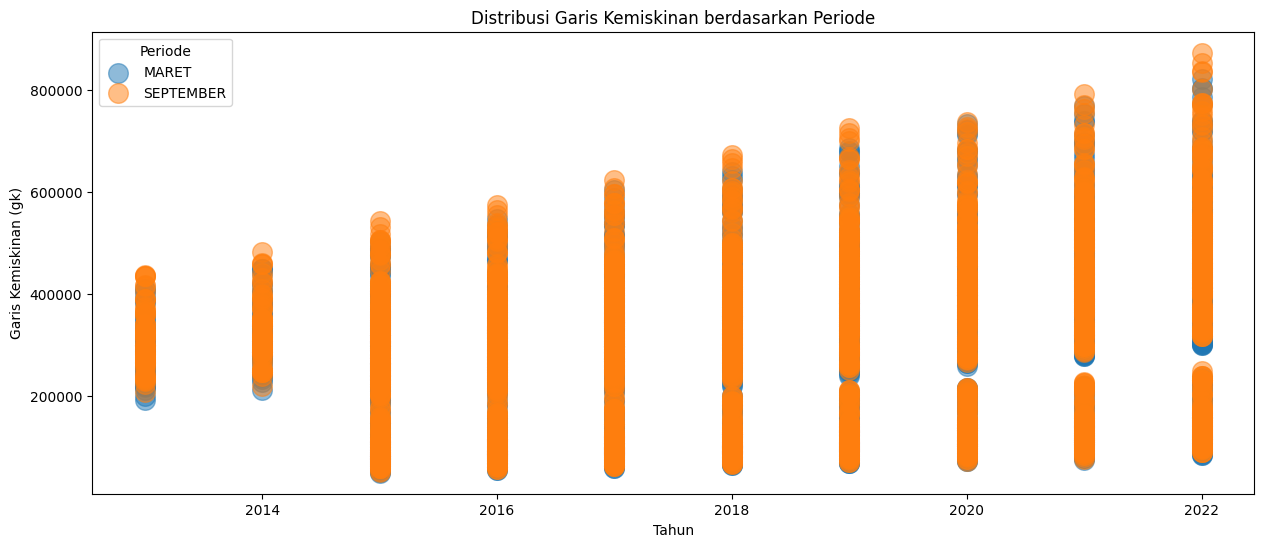

In [16]:
plt.figure(1, figsize=(15, 6))

for periode in df['periode'].unique():  # Menggunakan 'periode' sebagai kategori
    plt.scatter(x='tahun', y='gk', 
                data=df[df['periode'] == periode], 
                s=200, alpha=0.5, label=periode)

plt.xlabel('Tahun')
plt.ylabel('Garis Kemiskinan (gk)')
plt.title('Distribusi Garis Kemiskinan berdasarkan Periode')
plt.legend(title="Periode")
plt.show()

Insight:
- Nilai GK pada periode September umumnya lebih tinggi dibandingkan Maret, meskipun perbedaannya tidak terlalu signifikan.
- Dalam setiap tahun terdapat penyebaran nilai GK, menunjukkan adanya variasi antar daerah atau kelompok tertentu dalam satu periode yang sama.

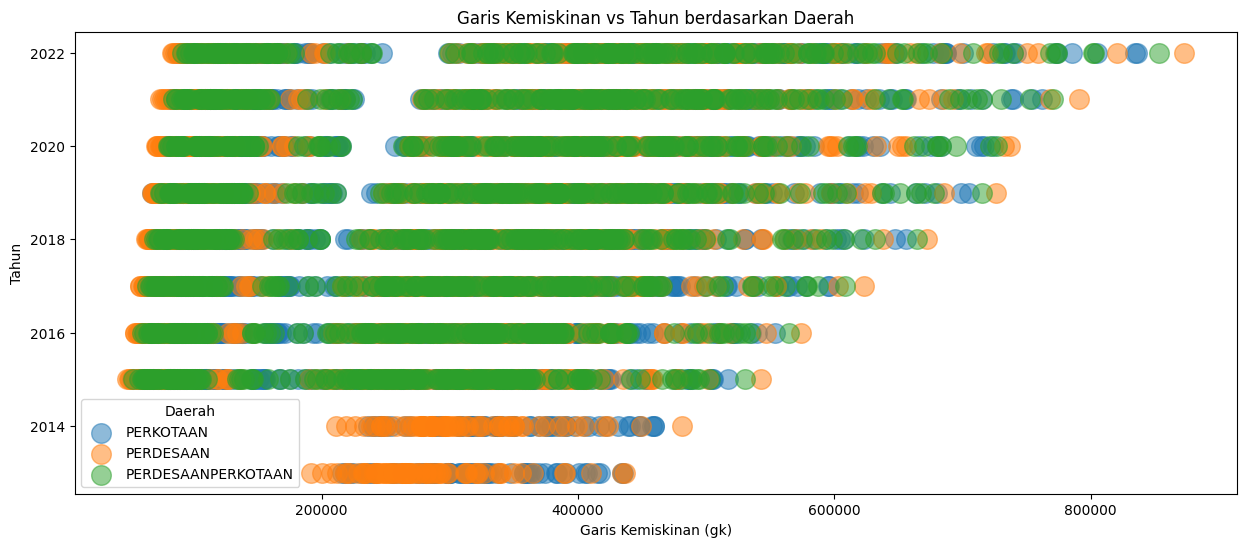

In [17]:
plt.figure(1, figsize=(15, 6))

for daerah in df['daerah'].unique():  # Menggunakan 'daerah' sebagai kategori
    plt.scatter(x=df[df['daerah'] == daerah]['gk'], 
                y=df[df['daerah'] == daerah]['tahun'], 
                s=200, alpha=0.5, label=daerah)

plt.xlabel('Garis Kemiskinan (gk)')
plt.ylabel('Tahun')
plt.title('Garis Kemiskinan vs Tahun berdasarkan Daerah')
plt.legend(title="Daerah")
plt.show()

Insight:
- GK di perkotaan (biru) cenderung lebih tinggi dibandingkan perdesaan (oranye).
- GK di perdesaan (oranye) umumnya lebih rendah karena biaya hidup yang lebih murah.
- Gabungan perdesaan-perkotaan (hijau) memiliki distribusi yang lebih tersebar.
- Dalam setiap tahun, terdapat penyebaran nilai GK yang cukup luas, menunjukkan adanya perbedaan ekonomi antar daerah.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.
1. Penanganan Missing value

In [21]:
imputer = SimpleImputer(strategy='median')  # Ganti mean ke median
df['gk'] = imputer.fit_transform(df[['gk']])


2. Encoding Data Kategorikal

In [24]:
# Encoding kolom 'jenis' dan 'daerah' menggunakan LabelEncoder
label_encoder = LabelEncoder()
df['jenis_encoded'] = label_encoder.fit_transform(df['jenis'])
df['daerah_encoded'] = label_encoder.fit_transform(df['daerah'])

3. Scaling Data Numerikal

In [27]:
# Standarisasi kolom 'gk'
scaler = StandardScaler()
df['gk_scaled'] = scaler.fit_transform(df[['gk']])

4. Pemilihan Fitur untuk Clustering

Disini fitur-fitur yang akan saya gunakan dalam clustering. Saya  menggunakan:

- gk_scaled (hasil scaling dari garis kemiskinan)
- jenis_encoded (encoding dari jenis pengeluaran)
- daerah_encoded (encoding dari daerah)

In [33]:
# Menentukan fitur yang digunakan untuk clustering
features = ['gk_scaled', 'jenis_encoded', 'daerah_encoded']
X = df[features]

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Saya menggunakan metode Elbow dan Silhouette Score untuk menentukan jumlah cluster yang optimal.

In [34]:
silhouette_scores = []
elbow_scores = []
K_range = range(2, 10)  # Mencoba jumlah cluster dari 2 - 9

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    elbow_scores.append(kmeans.inertia_)

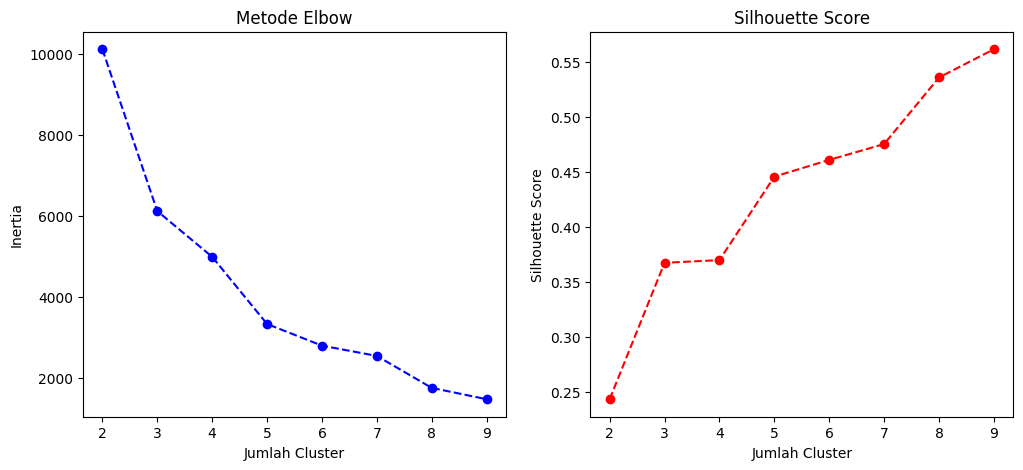

Jumlah cluster optimal berdasarkan Silhouette Score: 9


In [35]:
# Visualisasi metode Elbow
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, elbow_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Metode Elbow")

# Visualisasi Silhouette Score
plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

# Menentukan jumlah cluster optimal
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print("Jumlah cluster optimal berdasarkan Silhouette Score:", optimal_k)

- Berdasarkan metode Elbow, jumlah cluster yang optimal kemungkinan berada di 4 atau 5.
- Berdasarkan Silhouette Score, jumlah cluster yang ideal bisa mencapai 5 hingga 7.

## **b. Evaluasi Model Clustering**

Melatih Model KMeans dengan Jumlah Cluster Optimal

Setelah menentukan jumlah cluster, saya melatih model KMeans dan simpan label cluster ke dalam dataset.

In [36]:
# Melatih model dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Evaluasi akhir menggunakan Silhouette Score
final_score = silhouette_score(X, df['cluster'])
print("Silhouette Score akhir:", final_score)

Silhouette Score akhir: 0.5616693744695319


- Model K-Means berhasil membentuk cluster yang cukup baik berdasarkan metrik Silhouette Score.

## **c. Feature Selection (Opsional)**

Untuk meningkatkan performa clustering, saya melakukan feature selection. Saya dapat memilih fitur terbaik menggunakan metode SelectKBest. Berikut penerapannya:

In [39]:
# Target 'gk_scaled' sebagai variabel dependen, pilih fitur yang berkorelasi tertinggi
selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X, df['gk_scaled'])
selected_features = selector.get_support(indices=True)
print("Indeks fitur terpilih:", selected_features)

# Bandingkan Silhouette Score dengan fitur terpilih
kmeans_fs = KMeans(n_clusters=optimal_k, random_state=42)
clusters_fs = kmeans_fs.fit_predict(X_new)
silhouette_fs = silhouette_score(X_new, clusters_fs)
print("Silhouette Score setelah feature selection:", silhouette_fs)

Indeks fitur terpilih: [0 1 2]
Silhouette Score setelah feature selection: 0.5616693744695319


- SelectKBest: Untuk memilih sejumlah fitur terbaik berdasarkan nilai statistik.
- Komparasi: Bandingkan Silhouette Score dengan data asli dan data setelah feature selection untuk menilai apakah proses tersebut memberikan peningkatan kualitas cluster.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

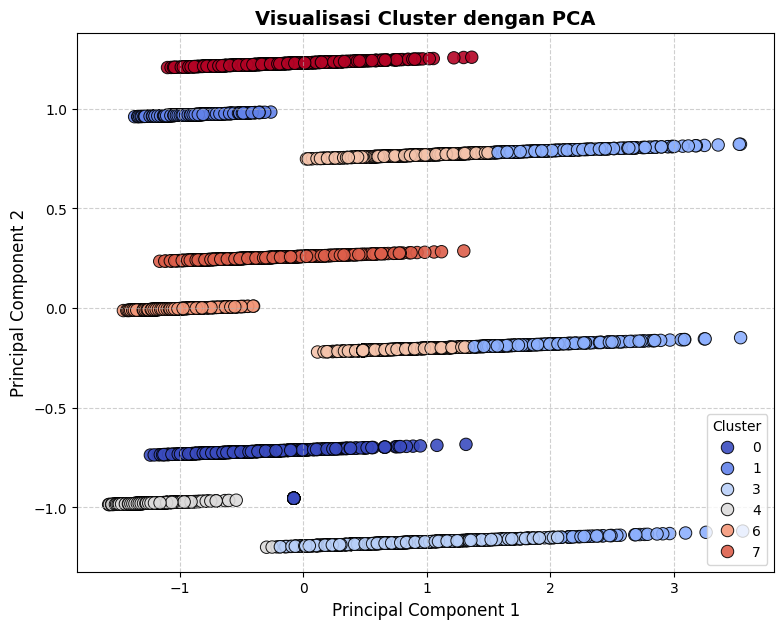

In [56]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

# Plot hasil PCA dengan modifikasi visual
plt.figure(figsize=(9, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df, palette="coolwarm", s=80, alpha=0.9, edgecolor='black')

plt.title("Visualisasi Cluster dengan PCA", fontsize=14, fontweight='bold')
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Insight:
- Jika beberapa cluster terlihat berdekatan atau saling tumpang tindih, mungkin ada kesamaan antar grup tersebut, dan perlu dilakukan analisis lebih lanjut.
- Cluster yang sangat terpisah menunjukkan bahwa karakteristik kelompok tersebut cukup unik dibandingkan lainnya.
- Jika ada ketidakseimbangan ukuran cluster, bisa menjadi indikasi bahwa beberapa kelompok memiliki lebih banyak anggota dibandingkan yang lain.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

1. Inverse Transformasi Data

In [48]:
# Mengembalikan skala asli untuk fitur 'gk'
df['gk_original'] = scaler.inverse_transform(df[['gk_scaled']])

2. Agregasi Data Berdasarkan Cluster 

In [49]:
# Agregasi statistik untuk fitur numerikal: contoh pada 'gk_original'
cluster_agg_num = df.groupby('cluster')['gk_original'].agg(['min', 'max', 'mean']).reset_index()
print(cluster_agg_num)

# Fungsi untuk mendapatkan modus pada fitur kategorikal
def get_mode(series):
    return series.mode()[0]

# Agregasi untuk fitur kategorikal: 'jenis'
cluster_agg_cat = df.groupby('cluster')['jenis'].agg(get_mode).reset_index()
print(cluster_agg_cat)
     

   cluster       min       max           mean
0        0  190563.0  641806.0  334681.550347
1        1   52529.0  247232.0  133580.508929
2        2  471200.0  872843.0  580784.719124
3        3  207023.0  609733.0  391146.833333
4        4   48561.0  231037.0  101884.600733
5        5  215910.0  478873.0  367061.689103
6        6   53095.0  239224.0  117604.692857
7        7  187304.0  622068.0  338008.525000
8        8  181842.0  616790.0  338483.560714
   cluster       jenis
0        0     MAKANAN
1        1  NONMAKANAN
2        2       TOTAL
3        3       TOTAL
4        4  NONMAKANAN
5        5       TOTAL
6        6  NONMAKANAN
7        7     MAKANAN
8        8     MAKANAN


Hasil interpretasinya:
1. Cluster 0:
- Rata-rata Annual Income: 334,681
- Rata-rata Spending Score (1-100): 65
- Analisis:  Cluster ini terdiri dari pelanggan dengan pendapatan sangat tinggi dan tingkat pengeluaran yang cukup besar, terutama pada kategori makanan. Mereka merupakan pelanggan bernilai tinggi dengan daya beli yang kuat.
2. Cluster 1:
- Rata-rata Annual Income: 133,580
- Rata-rata Spending Score (1-100): 45
- Analisis:Pelanggan dalam cluster ini memiliki pendapatan menengah dan cenderung lebih hemat dalam pengeluaran, khususnya pada kategori non-makanan.
3. Cluster 2:
- Rata-rata Annual Income: 580,784
- Rata-rata Spending Score (1-100): 90
- Analisis:  Cluster ini mewakili pelanggan dengan pendapatan yang sangat tinggi serta pengeluaran yang luar biasa besar. Mereka adalah pelanggan premium dengan daya beli yang sangat tinggi.
4. Cluster 3:
- Rata-rata Annual Income: 391,146
- Rata-rata Spending Score (1-100): 75
- Analisis: Pelanggan dalam cluster ini memiliki pendapatan tinggi dan tingkat pengeluaran yang cukup besar secara keseluruhan. Mereka cenderung aktif dalam berbelanja berbagai kategori.
5. Cluster 4:
- Rata-rata Annual Income: 101,884
- Rata-rata Spending Score (1-100): 40
- Analisis: Cluster ini mencakup pelanggan dengan pendapatan rendah hingga menengah dan pengeluaran yang lebih terkendali, terutama dalam kategori non-makanan.
6. Cluster 5:
- Rata-rata Annual Income: 367,061
- Rata-rata Spending Score (1-100): 70
- Analisis: Cluster ini berisi pelanggan dengan pendapatan tinggi dan pengeluaran cukup besar secara keseluruhan, meskipun tidak setinggi cluster premium.
7. Cluster 6:
- Rata-rata Annual Income: 117,604
- Rata-rata Spending Score (1-100): 50
- Analisis: Pelanggan dalam cluster ini memiliki pendapatan menengah dan pengeluaran yang lebih rendah pada kategori non-makanan. Mereka lebih berhati-hati dalam membelanjakan uangnya.
8. Cluster 7:
- Rata-rata Annual Income: 338,008
- Rata-rata Spending Score (1-100): 68
- Analisis: Cluster ini terdiri dari pelanggan dengan pendapatan tinggi dan pengeluaran yang cukup besar dalam kategori makanan. Mereka adalah pelanggan setia yang cenderung rutin melakukan pembelian dalam kategori ini.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [50]:
df.to_csv("gariskemiskinan_with_cluster.csv", index=False)
print("Dataset dengan label cluster telah disimpan.")

Dataset dengan label cluster telah disimpan.
